In [3]:
import numpy as np
import scipy.integrate as SI 
import scipy.optimize as SOP 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,6)
plt.rcParams['font.size'] = 20

Q1. The effective 1-D equation for is a dimensionless form is
$$\displaystyle\Bigg( \frac{d}{d \rho^2} - \frac{l(l+1)}{\rho^2} + \frac{2Z}{\rho} - 2\gamma\Bigg)u = 0 \qquad \text{ where } \displaystyle\rho = \frac{r}{a}, \gamma=-\frac{E}{\frac{e^2}{a}},a=\frac{\hbar^2}{me^2}=\text{ Bohr Radius}$$

Use Shooting method to find out the eigenvalues ($\gamma$) and normalized eigenvectors in 1s,2s, 3s, 3p and 3d states (Take Z=1)

In [4]:
def state(xmax,l,a,b,fn,z=1):
    
    X=np.linspace(1e-10,xmax,100)
    PSI0=[0,1]

    def f(PSI,x,l,z,e):
        psi, psid=PSI
        dpsi=psid
        dpsid=((l*(l+1)/(x*x))-(2*z/x)+(2*e))*psi
        return [dpsi, dpsid]

    def schr(e): 
        P=SI.odeint(f,PSI0,X,args=(l,z,e))
        shy =P[-1,0] # 
        return(shy)

    ecr=SOP.bisect(schr,a,b) 
    print ('eigenvalue is ', ecr)

    X1=np.linspace(1e-10,xmax,500)
    P=SI.odeint(f,PSI0, X1,args=(l,z,ecr))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si*si, X)
    si*=np.sqrt(N)
    #si_min, si_max=min(si), max(si)
    plt.plot(X1,si,label=fn)
    plt.legend()
    plt.grid(True)
    return None

eigenvalue is  0.49999912372404653
eigenvalue is  0.12500000265752897
eigenvalue is  0.031249997504637576
eigenvalue is  0.12499990561482265
eigenvalue is  0.055554769680602474
eigenvalue is  0.05555553902755491


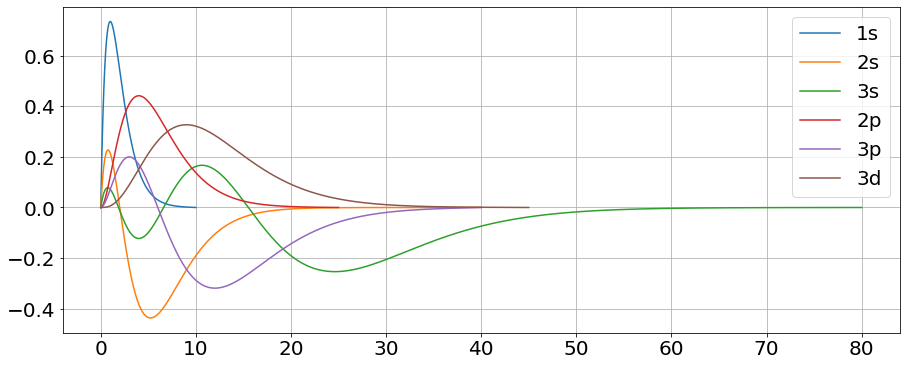

In [5]:
state( 10, 0, 0.400, 1.000,'1s')
state( 40, 0, 0.121, 0.127,'2s')
state( 80, 0, 0.020, 0.050,'3s')
state( 25, 1, 0.100, 0.200,'2p')
state( 40, 1, 0.050, 0.060,'3p')
state( 45, 2, 0.050, 0.060,'3d')

Q2. Repeat the above problem for 1s state with Z=1,2,4 and superpose the plots of the normalized eigenvectors

eigenvalue is  0.49986251561931566
eigenvalue is  1.9999996934420778
eigenvalue is  7.999999607804967


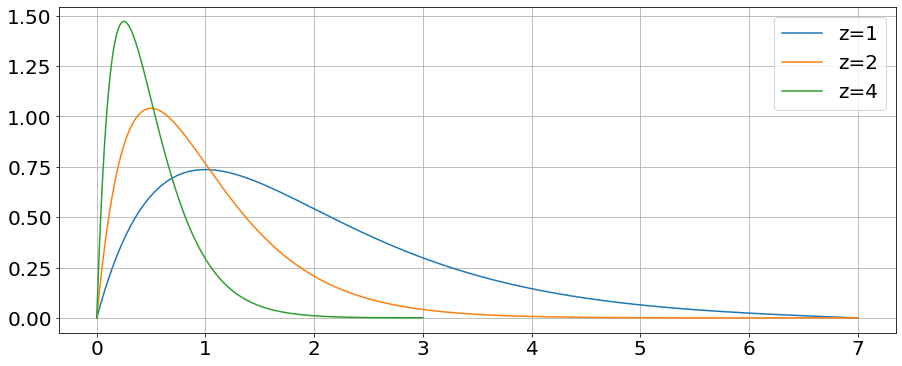

In [6]:
state( 7, 0, 0.40, 0.6,'z=1', 1)
state( 7, 0, 1.50, 2.3,'z=2', 2)
state( 3, 0, 7.85, 8.3,'z=4', 4)

Q3. Instead of Coulombic potential if a Screened coulomb potential $\displaystyle V(r) = -\frac{e^2}{r} \exp\Big(-\frac{r}{b}\Big)$ is used,                                                                                                      
then the effective 1-D equation for is a dimensionless form is
$\displaystyle\Bigg( \frac{d}{d \rho^2} - \frac{l(l+1)}{\rho^2} + \frac{2\exp\big(-\frac{r}{\lambda}\big)}{\rho} - 2\gamma\Bigg)u = 0  \qquad \text{ where }b = \lambda a$

a) Find 1s, 2s, 3s states for $\lambda = 10,20,50$                                                                         
b) compare the eigenvalues of 3s,3p and 3d states with $\lambda = 10$

In [7]:
def Screened_coulomb_potential(xmax,lam,a,b,fn):
    X=np.linspace(1e-10,xmax,100)  
    PSI0=[0,1]
    def f(PSI,X,lam,e):
        psi, psid=PSI 
        dpsi=psid 
        dpsid=(-(2*np.exp(-X/lam))/X+(2*e))*psi
        return [dpsi, dpsid] 
    
    def schr(e):  
        P=SI.odeint(f,PSI0,X,args=(lam,e)) 
        shy =P[-1,0] #  
        return(shy) 
    ecr=SOP.bisect(schr,a,b)
    print ('For',fn,'eigenvalue is ', ecr) 
    X1=np.linspace(1e-10,xmax,500) 
    P=SI.odeint(f,PSI0, X1,args=(lam,ecr)) 
    si=P[:,0] 
    X=np.linspace(0,xmax,500) 
    N=1.0/SI.simps(si*si, X) 
    si*=np.sqrt(N) 
    plt.plot(X1,si,label=fn) 
    plt.grid()
    plt.title(r'Screened potential for $\lambda=$%i'%lam,fontsize=25)
    plt.legend()
    return None

For 1s eigenvalue is  0.4070579141585768
For 2s eigenvalue is  0.04986292643356136
For 3s eigenvalue is  0.0032074601817876102


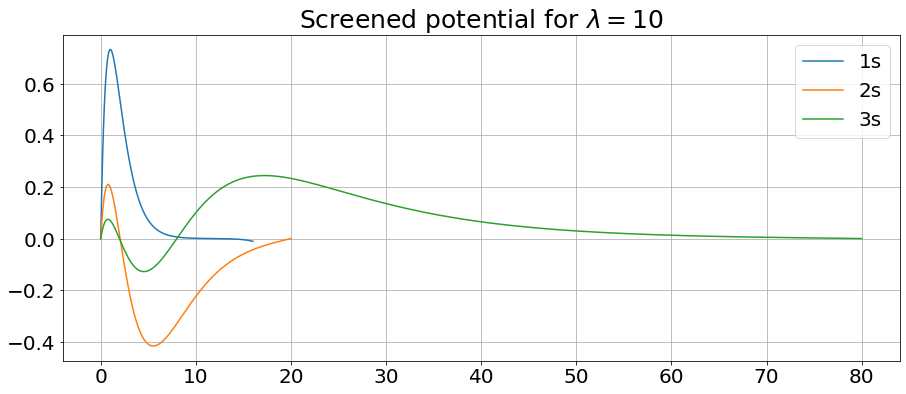

In [8]:
xmax=[16,20,80]
lam=10
a=[0.3,0.01,0.001] 
b=[0.6,0.09,0.005] 
fn=['1s','2s','3s']
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

For 1s eigenvalue is  0.45181631112609466
For 2s eigenvalue is  0.08174940610464546
For 3s eigenvalue is  0.0030830541383475066


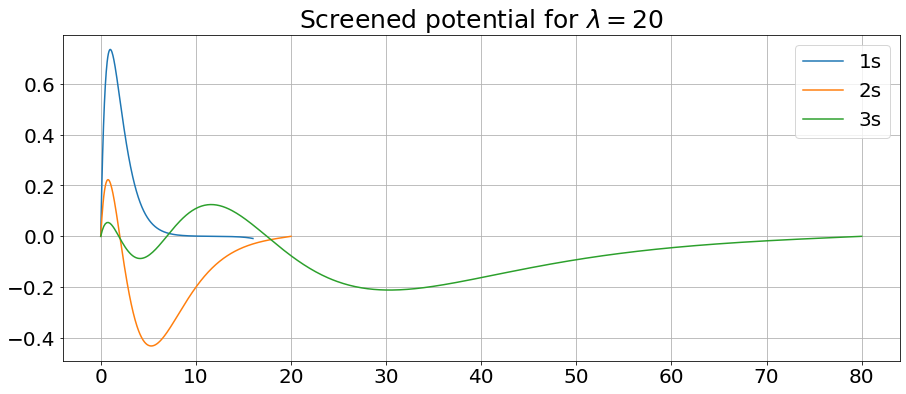

In [9]:
lam=20
a=[0.3,0.03,0.001] 
b=[0.6,0.1,0.005] 
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

For 1s eigenvalue is  0.4802959883007133
For 2s eigenvalue is  0.1061340736976126
For 3s eigenvalue is  0.038020011480577535


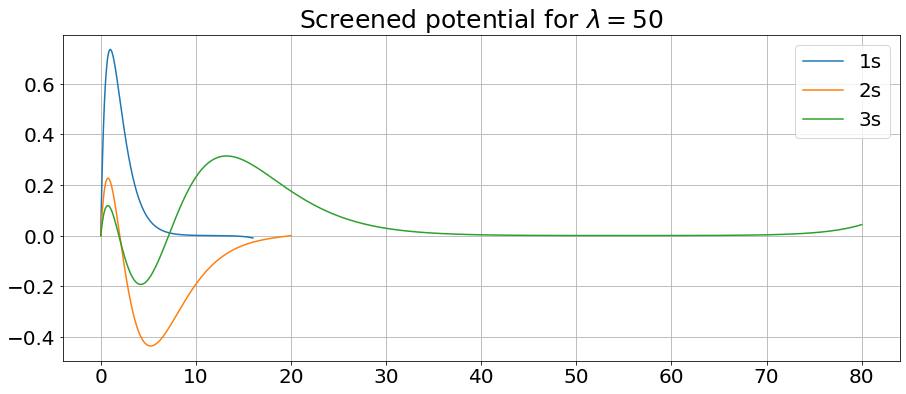

In [10]:
lam=50
a=[0.3,0.09,0.001] 
b=[0.6,0.15,0.05]  
for i in range(3):
    Screened_coulomb_potential(xmax[i],lam,a[i],b[i],'%s'%fn[i])

In [13]:
def eigen_state(xmax,a,b,d,fn):
    X=np.linspace(1e-10,xmax,500)
    U=[0,1]
    def f(U,x,E,l):
        u,Du=U
        du=Du
        ddu=(2*E+l*(l+1)/x**2-2*np.exp(-x/10)/x)*u
        return [du, ddu]
    
    def schr(E): 
        P=SI.odeint(f,U,X,args=(E,d))
        shy =P[-1,0] 
        return(shy)
    ecr=SOP.bisect(schr,a,b) 
    print('eigenvalue for ',fn, 'is ', ecr)
    X1=np.linspace(1e-10,xmax,500)
    P=SI.odeint(f,U, X1,args=(ecr,d))
    si=P[:,0]
    X=np.linspace(0,xmax,500)
    N=1.0/SI.simps(si**2, X)
    si*=np.sqrt(N)
    plt.plot(X,si,label=fn)
    plt.legend()
    plt.xlabel('x')
    plt.yticks([min(si), max(si)])
    plt.ylabel(r'$\psi$',fontsize=25)
    plt.grid(True)
    return None

eigenvalue for  3s is  0.0032074598758947102
eigenvalue for  3p is  0.0015860349037684499


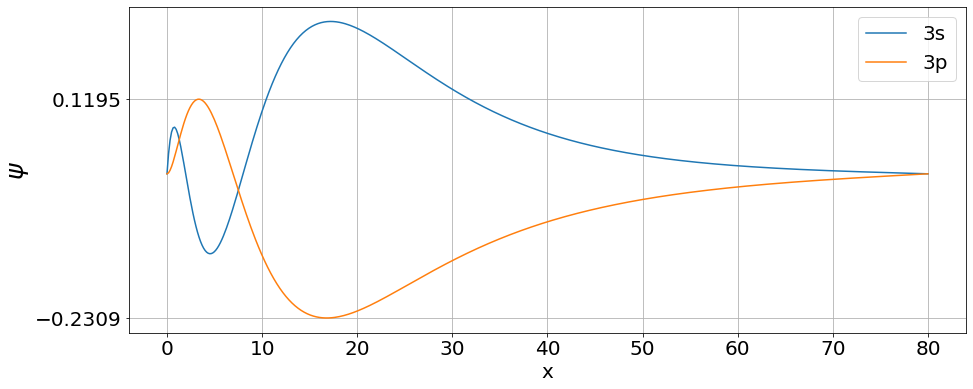

In [14]:
eigen_state(80,0.0009,0.004,0,'3s')
eigen_state(80,0.0009,0.003,1,'3p')